In [2]:
import pandas as pd
from scipy.interpolate import lagrange 

In [3]:
input_file = './data/catering_sale.xls'
output_file = './temp/sales.xls'

In [4]:
data = pd.read_excel(input_file)
data[u'销量'][(data[u'销量'] < 400) | (data[u'销量'] > 5000)] = None
data

C:\Users\kuang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,日期,销量
0,2015-03-01,NaN
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1
5,2015-02-24,3393.1
6,2015-02-23,3136.6
7,2015-02-22,3744.1
8,2015-02-21,NaN
9,2015-02-20,4060.3


In [5]:
def ployinterp_column(s, n, k=5):
    y = s[list(range(n-k,n)) + list(range(n+1, n+1+k))]
    y = y[y.notnull()]
    return lagrange(y.index, list(y))(n)

In [6]:
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            data[i][j] = ployinterp_column(data[i], j)

C:\Users\kuang\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
data.to_excel(output_file)

In [8]:
# 数据规范化
datafile = './data/normalization_data.xls'
data = pd.read_excel(datafile, header=None)

In [9]:
data

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


In [10]:
(data - data.min()) / (data.max() - data.min()) # 最小 - 最大规范化

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [11]:
(data - data.mean()) / data.std() # 零 - 均值规范化

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [12]:
import numpy as np

In [13]:
data / 10 ** np.ceil(np.log10(data.abs().max())) # 小数定标规范化

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


In [14]:
# 数据规范化
datafile = './data/discretization_data.xls'
data = pd.read_excel(datafile)
data = data[u'肝气郁结证型系数'].copy()
k = 4

In [15]:
d1 = pd.cut(data, k, labels=range(k)) # 等宽离散化，各个类别依次命名为0, 1, 2, 3
d1

0      0
1      3
2      0
3      2
4      1
5      3
6      1
7      2
8      1
9      1
10     2
11     1
12     2
13     2
14     1
15     2
16     0
17     1
18     2
19     1
20     1
21     1
22     2
23     1
24     1
25     1
26     1
27     1
28     2
29     2
      ..
900    2
901    0
902    1
903    1
904    1
905    2
906    0
907    1
908    2
909    2
910    2
911    0
912    1
913    0
914    1
915    3
916    0
917    0
918    0
919    1
920    2
921    0
922    1
923    0
924    2
925    2
926    0
927    2
928    2
929    1
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [16]:
# 等频率离散化
w = [1.0*i/k for i in range(k+1)]
w

[0.0, 0.25, 0.5, 0.75, 1.0]

In [17]:
w = data.describe(percentiles = w)[4:4+k+1] # 使用describe函数自动计算分位数
w

0%      0.02600
25%     0.17625
50%     0.23100
75%     0.28175
100%    0.50400
Name: 肝气郁结证型系数, dtype: float64

In [18]:
data.describe()

count    930.000000
mean       0.232154
std        0.078292
min        0.026000
25%        0.176250
50%        0.231000
75%        0.281750
max        0.504000
Name: 肝气郁结证型系数, dtype: float64

In [19]:
w[0]

0.025999999999999999

In [20]:
w[0] = w[0] * (1-1e-10)
w[0]

0.025999999997399999

In [21]:
d2 = pd.cut(data, w, labels=range(k))
d2

0      0
1      3
2      0
3      3
4      2
5      3
6      2
7      3
8      2
9      1
10     3
11     2
12     2
13     2
14     1
15     2
16     0
17     0
18     3
19     0
20     0
21     1
22     2
23     2
24     0
25     0
26     1
27     2
28     2
29     3
      ..
900    2
901    0
902    1
903    0
904    1
905    3
906    0
907    1
908    3
909    3
910    3
911    0
912    1
913    0
914    0
915    3
916    0
917    0
918    0
919    0
920    3
921    0
922    0
923    0
924    3
925    3
926    0
927    3
928    3
929    0
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [22]:
from sklearn.cluster import KMeans # 引入KMeans
kmodel = KMeans(n_clusters = k, n_jobs=4) # 建立模型，n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data.reshape((len(data), 1))) # 训练模型

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=4, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [23]:
data

0      0.056
1      0.488
2      0.107
3      0.322
4      0.242
5      0.389
6      0.246
7      0.330
8      0.257
9      0.205
10     0.330
11     0.235
12     0.267
13     0.281
14     0.184
15     0.271
16     0.100
17     0.173
18     0.302
19     0.176
20     0.172
21     0.195
22     0.281
23     0.245
24     0.156
25     0.168
26     0.211
27     0.255
28     0.279
29     0.341
       ...  
900    0.277
901    0.135
902    0.214
903    0.173
904    0.205
905    0.384
906    0.134
907    0.184
908    0.294
909    0.341
910    0.317
911    0.098
912    0.195
913    0.102
914    0.172
915    0.415
916    0.122
917    0.106
918    0.107
919    0.165
920    0.302
921    0.127
922    0.152
923    0.131
924    0.311
925    0.284
926    0.103
927    0.287
928    0.296
929    0.169
Name: 肝气郁结证型系数, dtype: float64

In [24]:
data.reshape((len(data), 1))

array([[ 0.056],
       [ 0.488],
       [ 0.107],
       [ 0.322],
       [ 0.242],
       [ 0.389],
       [ 0.246],
       [ 0.33 ],
       [ 0.257],
       [ 0.205],
       [ 0.33 ],
       [ 0.235],
       [ 0.267],
       [ 0.281],
       [ 0.184],
       [ 0.271],
       [ 0.1  ],
       [ 0.173],
       [ 0.302],
       [ 0.176],
       [ 0.172],
       [ 0.195],
       [ 0.281],
       [ 0.245],
       [ 0.156],
       [ 0.168],
       [ 0.211],
       [ 0.255],
       [ 0.279],
       [ 0.341],
       [ 0.23 ],
       [ 0.266],
       [ 0.252],
       [ 0.227],
       [ 0.277],
       [ 0.329],
       [ 0.32 ],
       [ 0.053],
       [ 0.152],
       [ 0.269],
       [ 0.042],
       [ 0.179],
       [ 0.239],
       [ 0.167],
       [ 0.209],
       [ 0.432],
       [ 0.354],
       [ 0.247],
       [ 0.328],
       [ 0.215],
       [ 0.433],
       [ 0.294],
       [ 0.237],
       [ 0.244],
       [ 0.199],
       [ 0.286],
       [ 0.219],
       [ 0.261],
       [ 0.316

In [25]:
c = pd.DataFrame(kmodel.cluster_centers_).sort(0) # 输出聚类中心，并且排序（默认是随机序的）
w = pd.rolling_mean(c, 2).iloc[1:] # 相邻两项求中点，做为边界点
w = [0] + list(w[0]) + [data.max()] # 把首末边界点加上
d3 = pd.cut(data, w, labels=range(k))

C:\Users\kuang\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\kuang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=2).mean()
  from ipykernel import kernelapp as app


In [26]:
c

,0
2,0.136954
0,0.220441
3,0.295007
1,0.408679


In [27]:
w

[0, 0.17869758895131088, 0.25772406433683875, 0.35184318136037063, 0.504]

In [28]:
d3

0      0
1      3
2      0
3      2
4      1
5      3
6      1
7      2
8      1
9      1
10     2
11     1
12     2
13     2
14     1
15     2
16     0
17     0
18     2
19     0
20     0
21     1
22     2
23     1
24     0
25     0
26     1
27     1
28     2
29     2
      ..
900    2
901    0
902    1
903    0
904    1
905    3
906    0
907    1
908    2
909    2
910    2
911    0
912    1
913    0
914    0
915    3
916    0
917    0
918    0
919    0
920    2
921    0
922    0
923    0
924    2
925    2
926    0
927    2
928    2
929    0
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

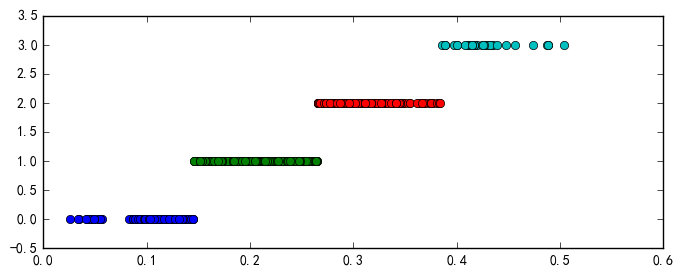

In [29]:
def cluster_plot(d, k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize = (8, 3))
    for j in range(0, k):
        plt.plot(data[d==j], [j for i in d[d==j]], 'o')
        
    plt.ylim(-0.5, k-0.5)
    return plt

cluster_plot(d1, k).show()

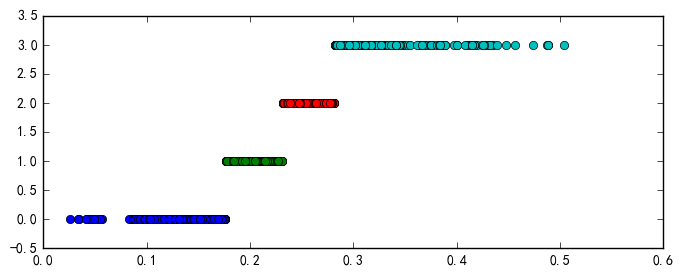

In [30]:
cluster_plot(d2, k).show()

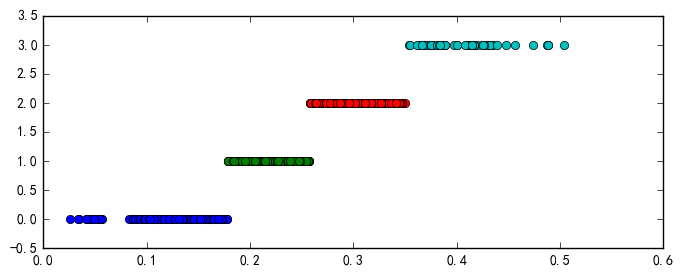

In [31]:
cluster_plot(d3, k).show()

In [32]:
inputfile = './data/electricity_data.xls' # 供入供出电量数据
outputfile = './temp/electricity_data.xls' # 属性构造后数据文件

In [33]:
data = pd.read_excel(inputfile)
data

,供入电量,供出电量
0,986,912
1,1208,1083
2,1108,975
3,1082,934
4,1285,1102


In [34]:
data[u'线损率'] = (data[u'供入电量'] - data[u'供出电量']) / data[u'供入电量']
data

,供入电量,供出电量,线损率
0,986,912,0.075051
1,1208,1083,0.103477
2,1108,975,0.120036
3,1082,934,0.136784
4,1285,1102,0.142412


In [35]:
data.to_excel(outputfile, index=False)

In [36]:
# 4.4 数据规约
inputfile = './data/principal_component.xls'
outputfile = './temp/dimention_reducted.xls'

data = pd.read_excel(inputfile, header=None)

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
pca.components_

array([[-0.56788461, -0.2280431 , -0.23281436, -0.22427336, -0.3358618 ,
        -0.43679539, -0.03861081, -0.46466998],
       [-0.64801531, -0.24732373,  0.17085432,  0.2089819 ,  0.36050922,
         0.55908747, -0.00186891, -0.05910423],
       [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
        -0.20091919, -0.00124421,  0.80699041],
       [-0.19404741,  0.9021939 , -0.00730164, -0.01424541,  0.03106289,
         0.12563004,  0.11152105, -0.3448924 ],
       [ 0.06133747,  0.03383817, -0.12652433, -0.64325682,  0.3896425 ,
         0.10681901, -0.63233277, -0.04720838],
       [-0.02579655,  0.06678747, -0.12816343,  0.57023937,  0.52642373,
        -0.52280144, -0.31167833, -0.0754221 ],
       [ 0.03800378, -0.09520111, -0.15593386, -0.34300352,  0.56640021,
        -0.18985251,  0.69902952, -0.04505823],
       [ 0.10147399, -0.03937889, -0.91023327,  0.18760016, -0.06193777,
         0.34598258,  0.02090066, -0.02137393]])

In [40]:
pca.explained_variance_ratio_

array([  7.74011263e-01,   1.56949443e-01,   4.27594216e-02,
         2.40659228e-02,   1.50278048e-03,   4.10990447e-04,
         2.07718405e-04,   9.24594471e-05])

In [41]:
# 选取前三个主成分
pca = PCA(3)
pca.fit(data)
low_d = pca.transform(data) # 用它来降低维度
pd.DataFrame(low_d).to_excel(outputfile) # 保存结果
pca.inverse_transform(low_d) # 必要时可以用inverse_transform()函数复原数据

array([[ 41.81945026,  17.92938537,   7.42743613,   6.38423781,
          7.51911186,   7.95581778,   1.89450158,  22.64634237],
       [ 26.03033486,   8.31048339,  11.0923029 ,  10.50941053,
         13.73592734,  19.29219354,   1.55616178,  10.69991334],
       [ 12.8912027 ,   4.7200299 ,   4.15574756,   3.88084002,
          4.15590258,   5.95354081,   0.63142514,   3.10031979],
       [ 21.95107023,   7.86983692,   5.61296149,   5.00363184,
          5.46598715,   7.32692984,   1.00043437,   6.90279388],
       [ 33.2494621 ,  16.9295226 ,   6.97070109,   6.54184048,
          8.78799069,   9.47854775,   1.76803069,  25.48379317],
       [ 35.30223656,  14.31635159,  16.19611986,  15.83211443,
         22.51688172,  30.25654088,   2.46591519,  25.94480913],
       [ 22.0404299 ,   7.67212745,   9.96458085,   9.59042702,
         12.69748404,  17.7402549 ,   1.39886681,  10.62704002],
       [ 47.82344306,  16.03581175,  11.11907058,   9.5362307 ,
         11.08119152,  14.2446198

In [42]:
low_d

array([[ -8.19133694, -16.90402785,   3.90991029],
       [ -0.28527403,   6.48074989,  -4.62870368],
       [ 23.70739074,   2.85245701,  -0.4965231 ],
       [ 14.43202637,  -2.29917325,  -1.50272151],
       [ -5.4304568 , -10.00704077,   9.52086923],
       [-24.15955898,   9.36428589,   0.72657857],
       [  3.66134607,   7.60198615,  -2.36439873],
       [-13.96761214, -13.89123979,  -6.44917778],
       [-40.88093588,  13.25685287,   4.16539368],
       [  1.74887665,   4.23112299,  -0.58980995],
       [ 21.94321959,   2.36645883,   1.33203832],
       [ 36.70868069,   6.00536554,   3.97183515],
       [ -3.28750663,  -4.86380886,   1.00424688],
       [ -5.99885871,  -4.19398863,  -8.59953736]])